In [1]:
'''
    kaggle master의 ipynb를 따라해보고 visualization, modeling과 관련해 노하우를 배우는 것을 목적으로 한다.
    kaggle master : Subin An
    link : https://www.kaggle.com/code/subinium/kaggle-2020-visualization-analysis
'''

'\n    kaggle master의 ipynb를 따라해보고 visualization, modeling과 관련해 노하우를 배우는 것을 목적으로 한다.\n    kaggle master : Subin An\n    link : https://www.kaggle.com/code/subinium/kaggle-2020-visualization-analysis\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec 

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [3]:
data = pd.read_csv('../../data/kaggle_practice/kaggle_survey_2020_responses.csv')
questions = data.iloc[0, :].T
data = data.iloc[1:, :]
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


### Q1 & Q2. Age/Gender Distribution

In [4]:
data_q1 = data['Q1'].value_counts().sort_index()
data_q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

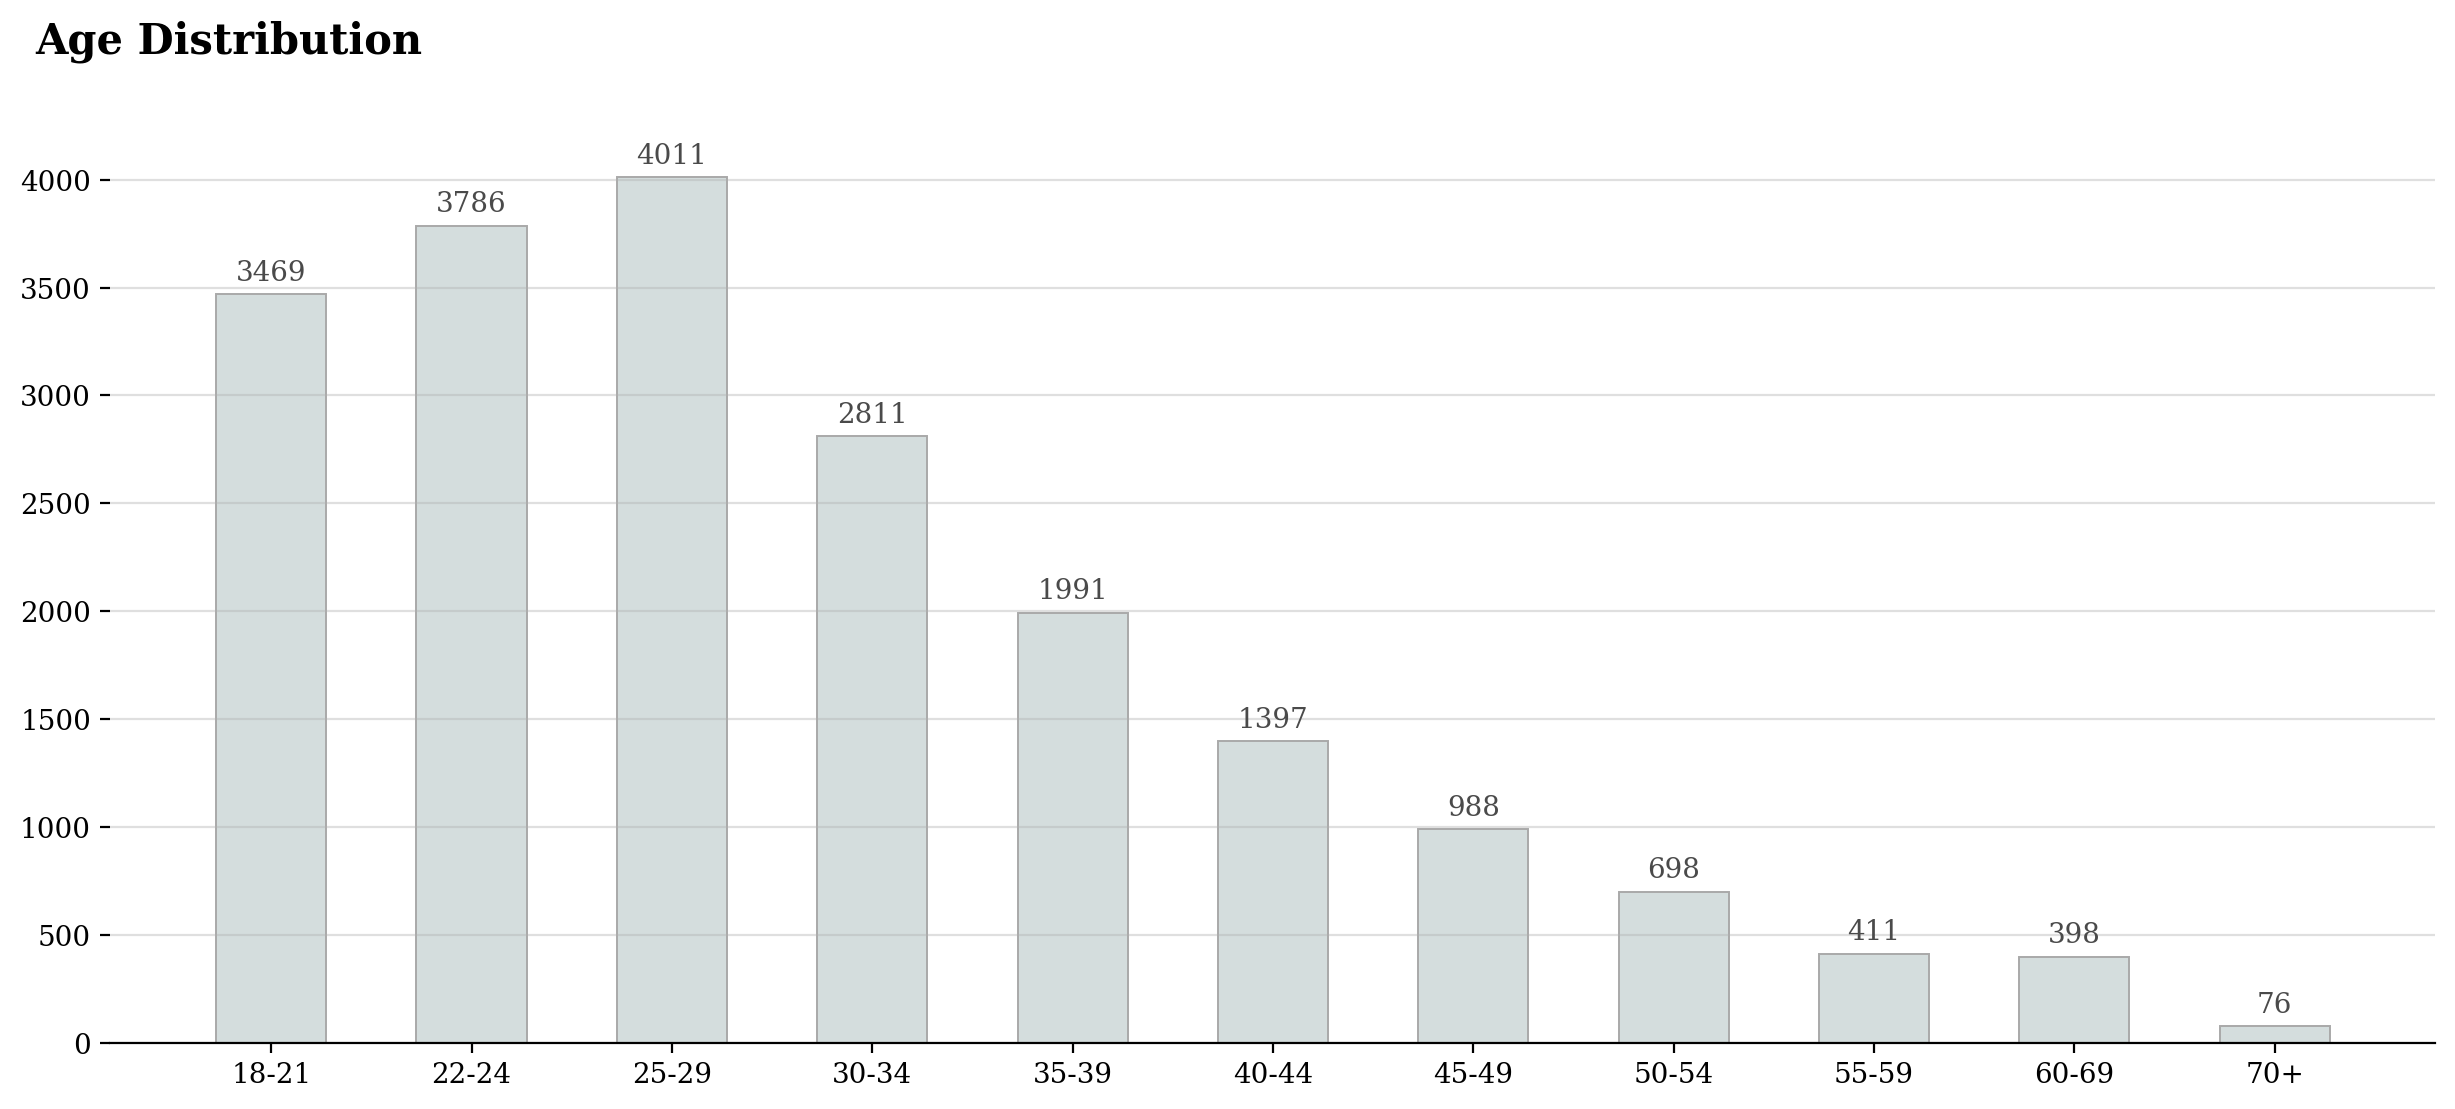

In [5]:
# Q1 & Q2 Analysis
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(data_q1.index, data_q1, width=0.55, edgecolor='darkgray', color='#d4dddd', linewidth=0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", xy=(i, data_q1[i] + 100), 
                va='center', ha='center', fontweight='light', fontfamily='serif', color='#4a4a4a')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500), fontfamily='serif')
fig.text(0.1, 0.95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
ax.grid(axis='y', linestyle='-', alpha=0.4)    
plt.show()

In [6]:
data['Q2'] = data['Q2'].apply(lambda x : 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

In [7]:
man

Q1
18-21    2611
22-24    2838
25-29    3128
30-34    2246
35-39    1581
40-44    1153
45-49     840
50-54     605
55-59     353
60-69     362
70+        72
Name: Man, dtype: int64

In [8]:
woman

Q1
18-21   -796
22-24   -886
25-29   -819
30-34   -504
35-39   -368
40-44   -222
45-49   -126
50-54    -81
55-59    -45
60-69    -29
70+       -2
Name: Woman, dtype: int64

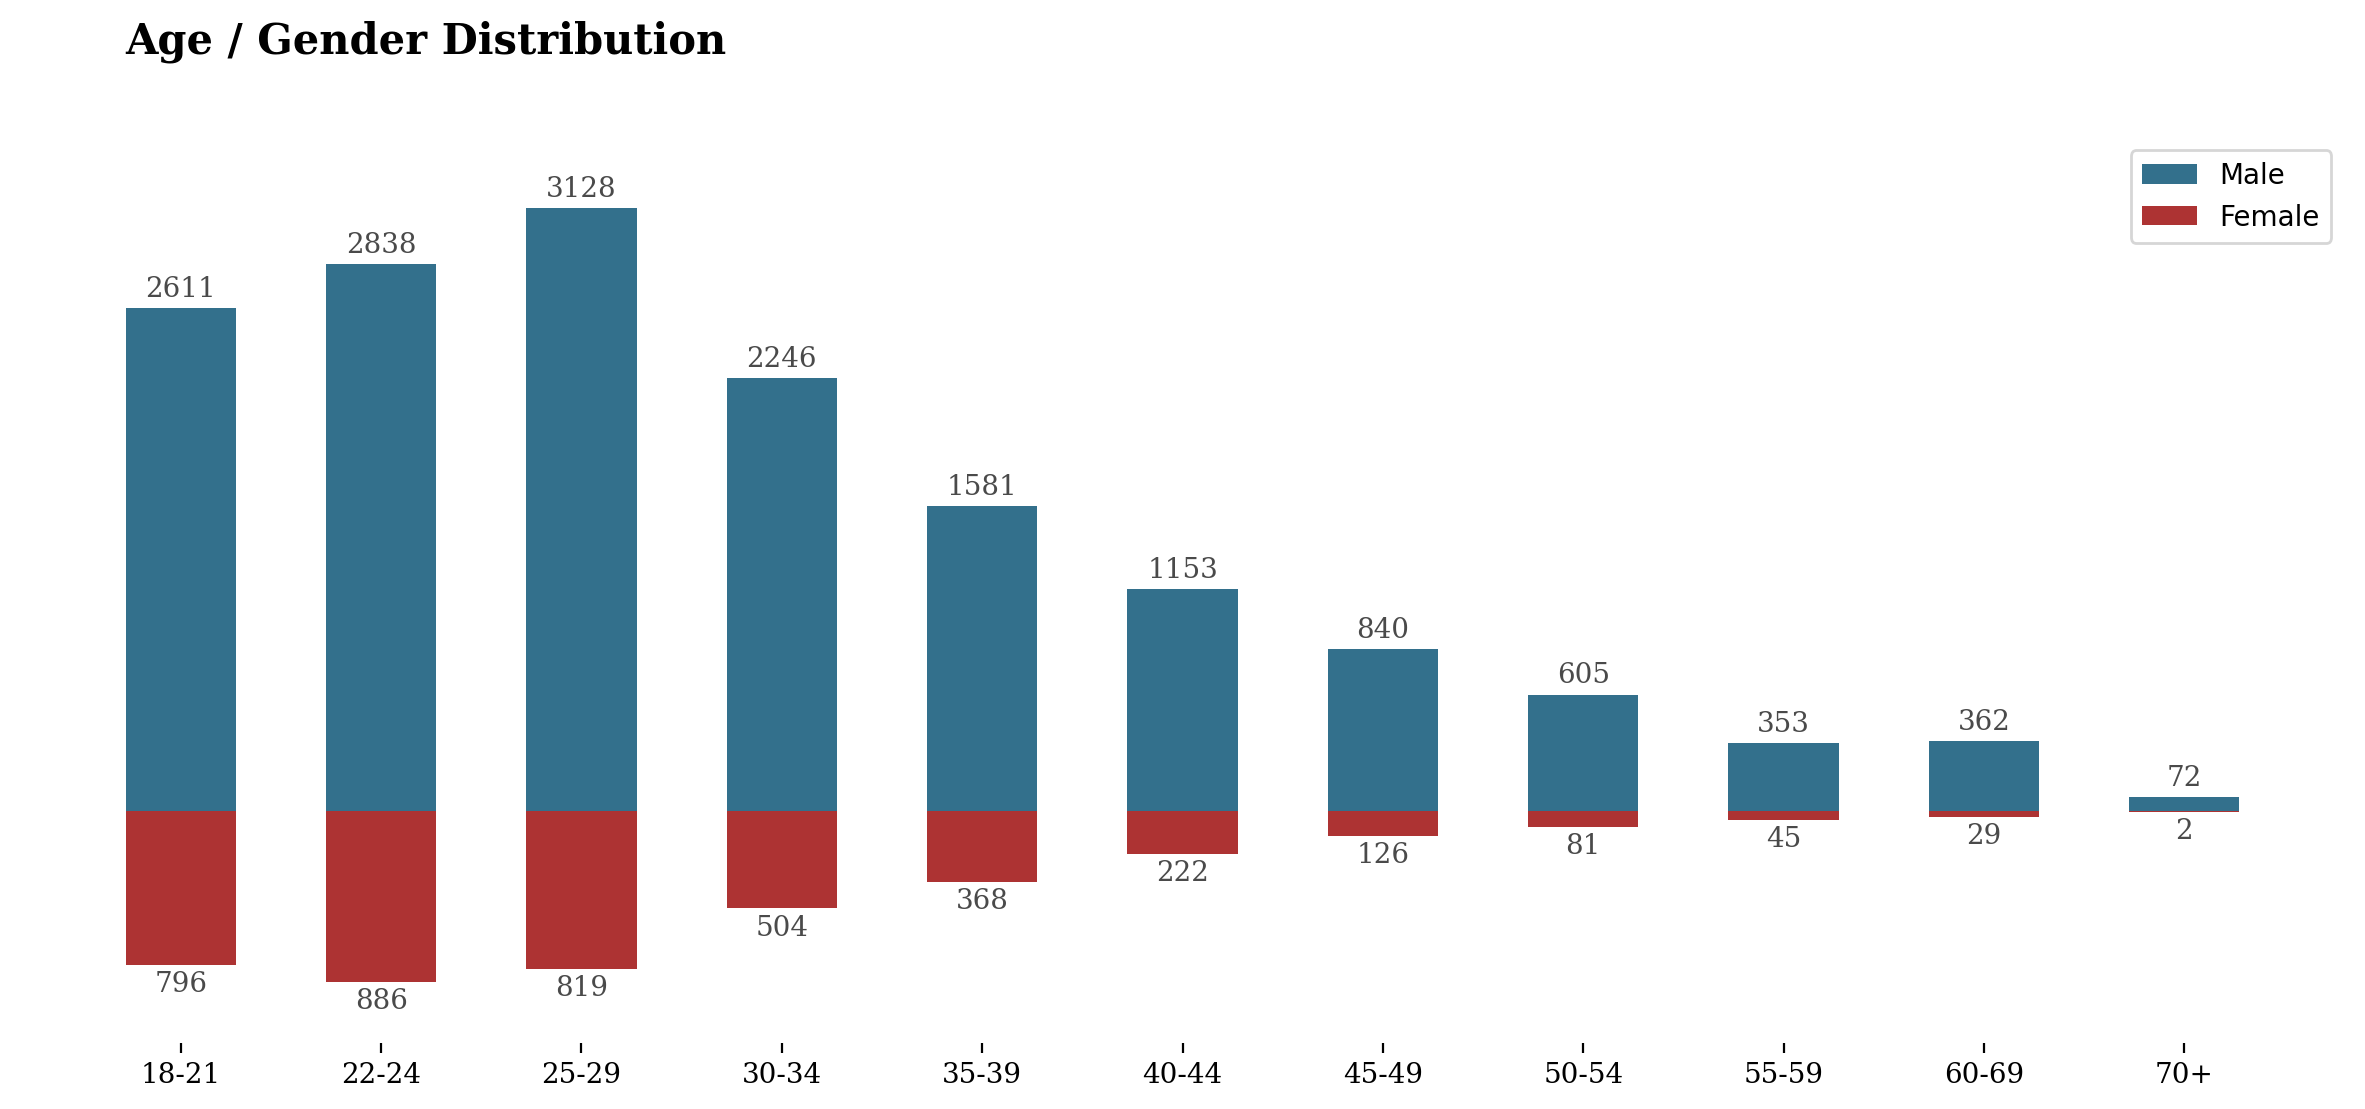

In [9]:
# Q2 Analysis
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.bar(man.index, man, width=0.55, color='#004c70', alpha=0.8, label='Male')
ax.bar(woman.index, woman, width=0.55, color='#990000', alpha=0.8, label='Female')
ax.set_ylim(-1200, 3500)

for i in man.index:
    ax.annotate(f"{man[i]}", xy=(i, man[i] + 100),
                va='center', ha='center',fontweight='light', fontfamily='serif', color='#4a4a4a')
    
for i in woman.index:
    ax.annotate(f"{-woman[i]}", xy=(i, woman[i] - 100),
                va='center', ha='center',fontweight='light', fontfamily='serif', color='#4a4a4a')    

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])
ax.legend()
fig.text(0.16, 0.95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')    
plt.show()

### Q2 & Q3. Gender & Country

In [10]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]

In [11]:
data_q2q3_ratio

Q2,Man,Woman,ETC
Turkey,0.723837,0.252907,0.023256
Germany,0.806931,0.163366,0.029703
China,0.818565,0.145570,0.035865
Nigeria,0.823529,0.170168,0.006303
UK,0.789366,0.186094,0.024540
Russia,0.843643,0.137457,0.018900
Japan,0.924765,0.065831,0.009404
Brazil,0.863112,0.134006,0.002882
USA,0.751006,0.215914,0.033080
India,0.767561,0.220304,0.012135


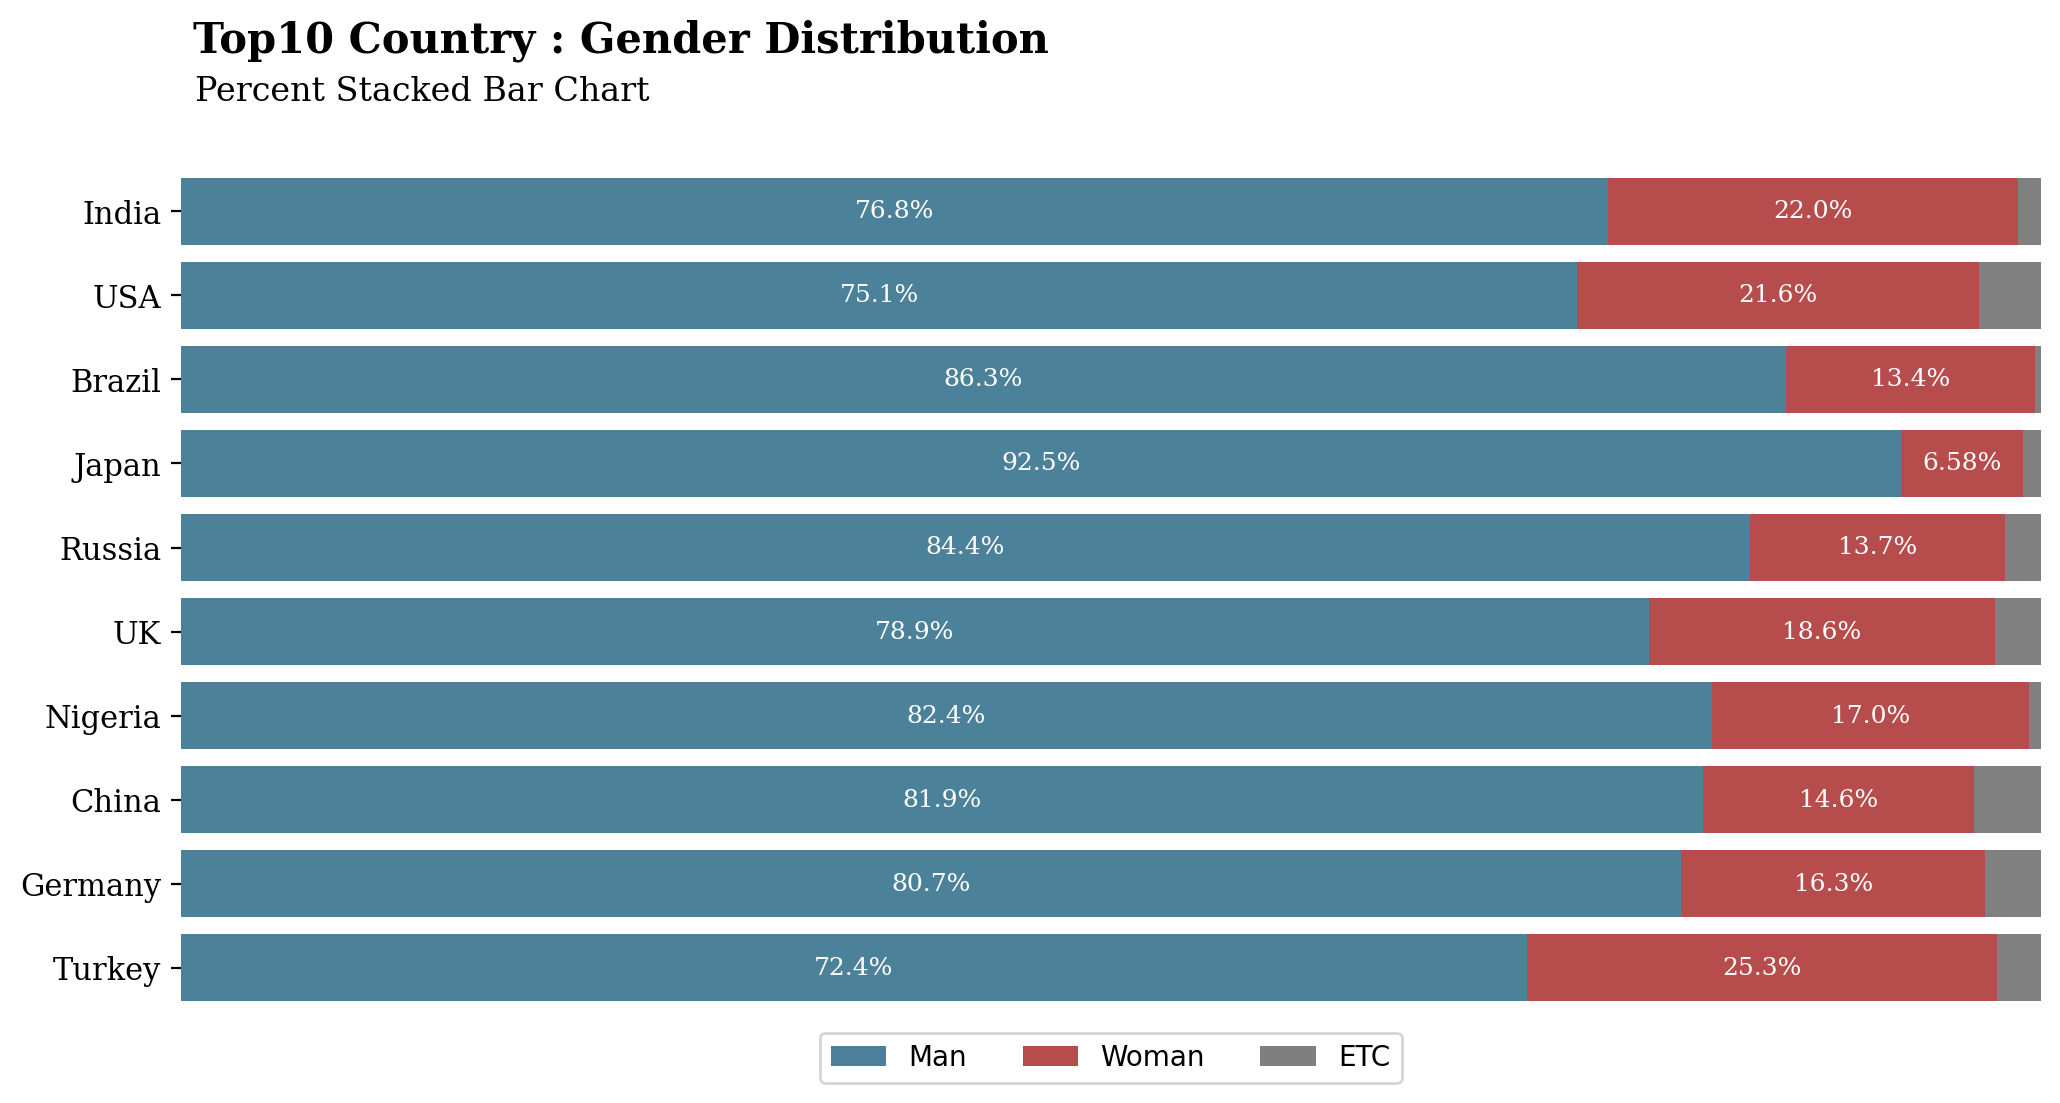

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#004c70', alpha=0.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], left=data_q2q3_ratio['Man'], color='#990000', alpha=0.7, label='Woman')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], left=data_q2q3_ratio['Man']+data_q2q3_ratio['Woman'], color='#4a4a4a', alpha=0.7, label='ETC')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif', color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif', color='white')
    
fig.text(0.13, 0.95, 'Top10 Country : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.91, 'Percent Stacked Bar Chart', fontsize=12, fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))
plt.show()